# SUYASH PRATAP SINGH

# TASKS 1:-
Supervised Machine Learning Task

Diabetes Prediction

• Dataset Link: https://www.kaggle.com/rahulsah06/machinelearning-for-diabetes-with-python

• Perform Data analysis and use different machine learning algorithms.

• Compare at least 3 different Algorithms and show their accuracies with the help of graph

# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle
import sklearn
import scipy
import seaborn as sns
sns.set()

In [2]:
import plotly.express as px

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix

# Loading the dataset

In [27]:
df = pd.read_csv(r'C:\Users\Admin\Desktop\KAGGLE\diabetes_data.csv',index_col = 0)
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1


In [5]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
print("Numerical Features Count {}".format(len(numerical_feature)))

Numerical Features Count 9


In [6]:
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
print("Discrete feature Count {}".format(len(discrete_feature)))

Discrete feature Count 2


In [7]:
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 7


In [8]:
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Categorical feature Count {}".format(len(categorical_feature)))

Categorical feature Count 0


# Check Missing Value:-

In [16]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
# Handle Missing Values
df.isnull().sum()*100/len(df)

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

# Shape of dataset

In [10]:
df.shape

(768, 9)

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Heatmap

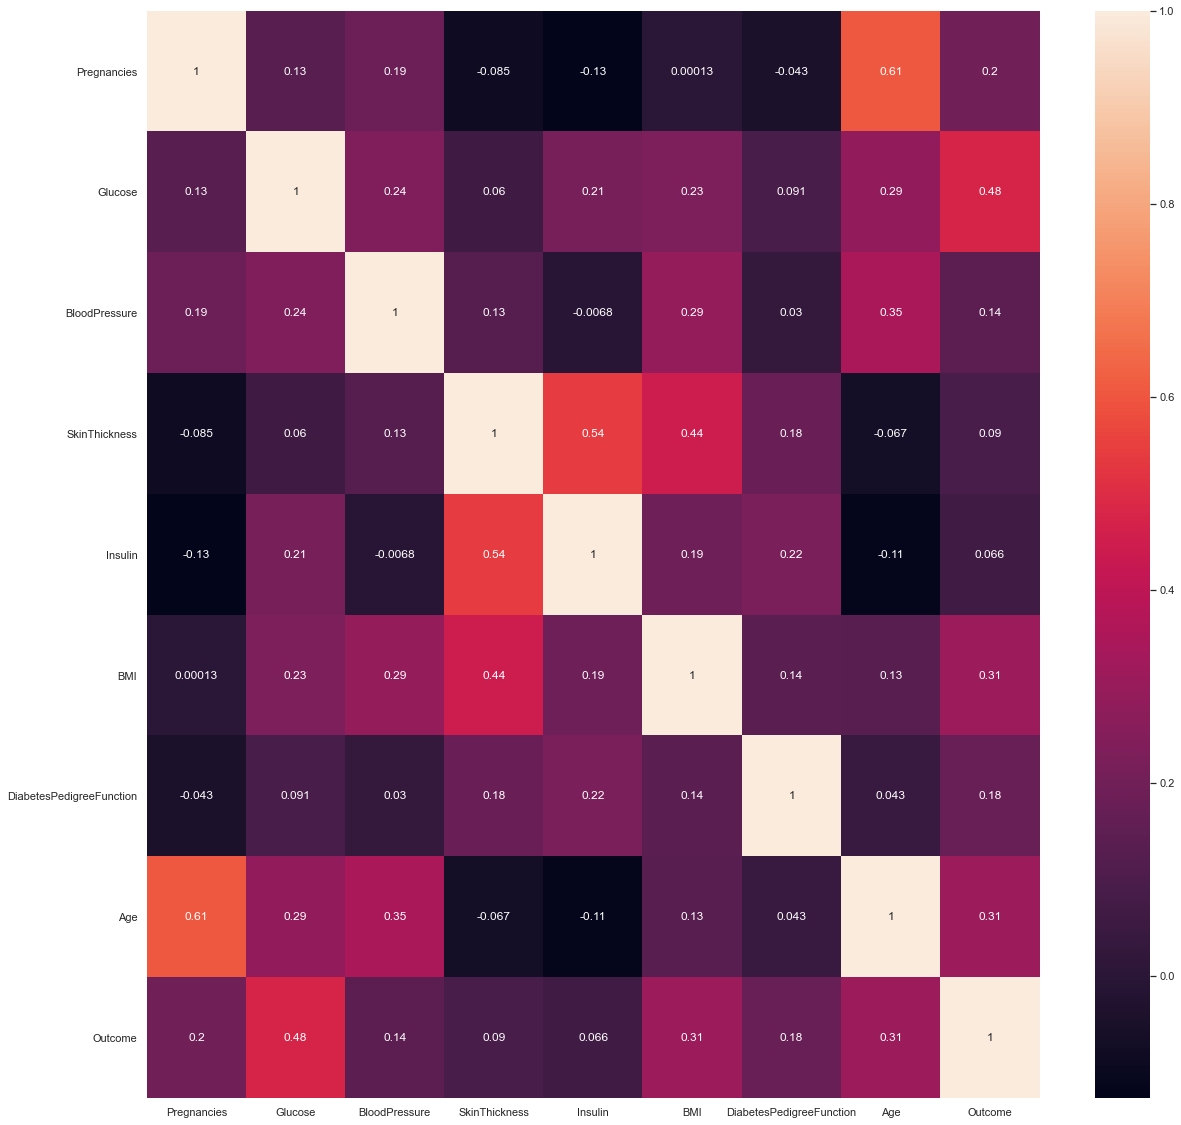

In [13]:
teju = df.corr(method = "spearman")
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(teju,annot=True)

# Distplot

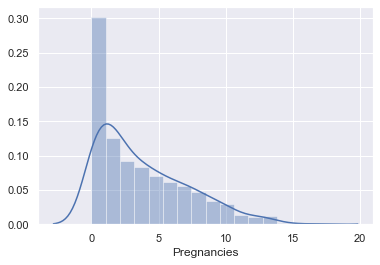

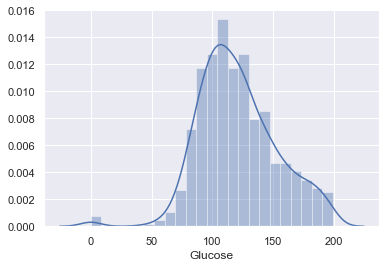

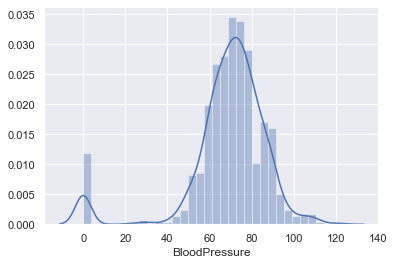

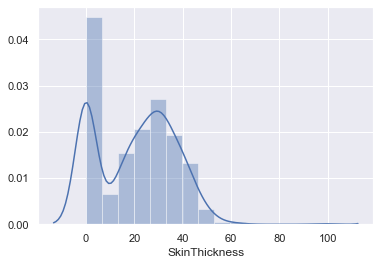

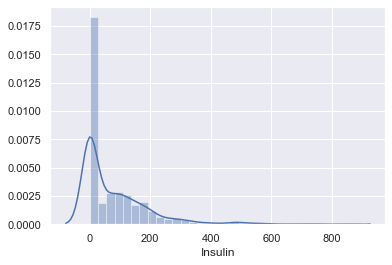

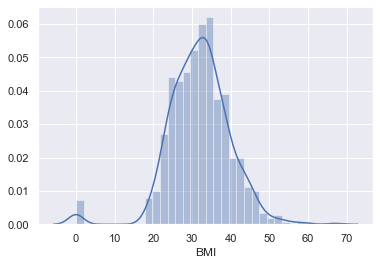

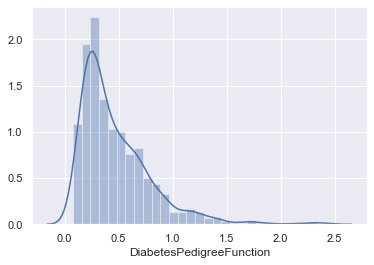

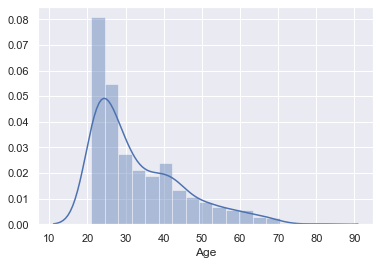

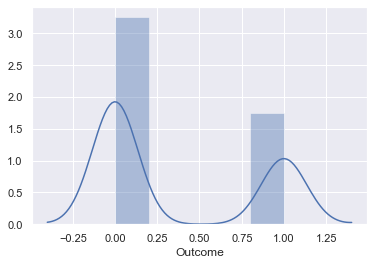

In [14]:
df_feature = df.columns

for feature in df_feature:
    p = sns.distplot(a = df[feature])
    plt.show()

# Histogram Plot

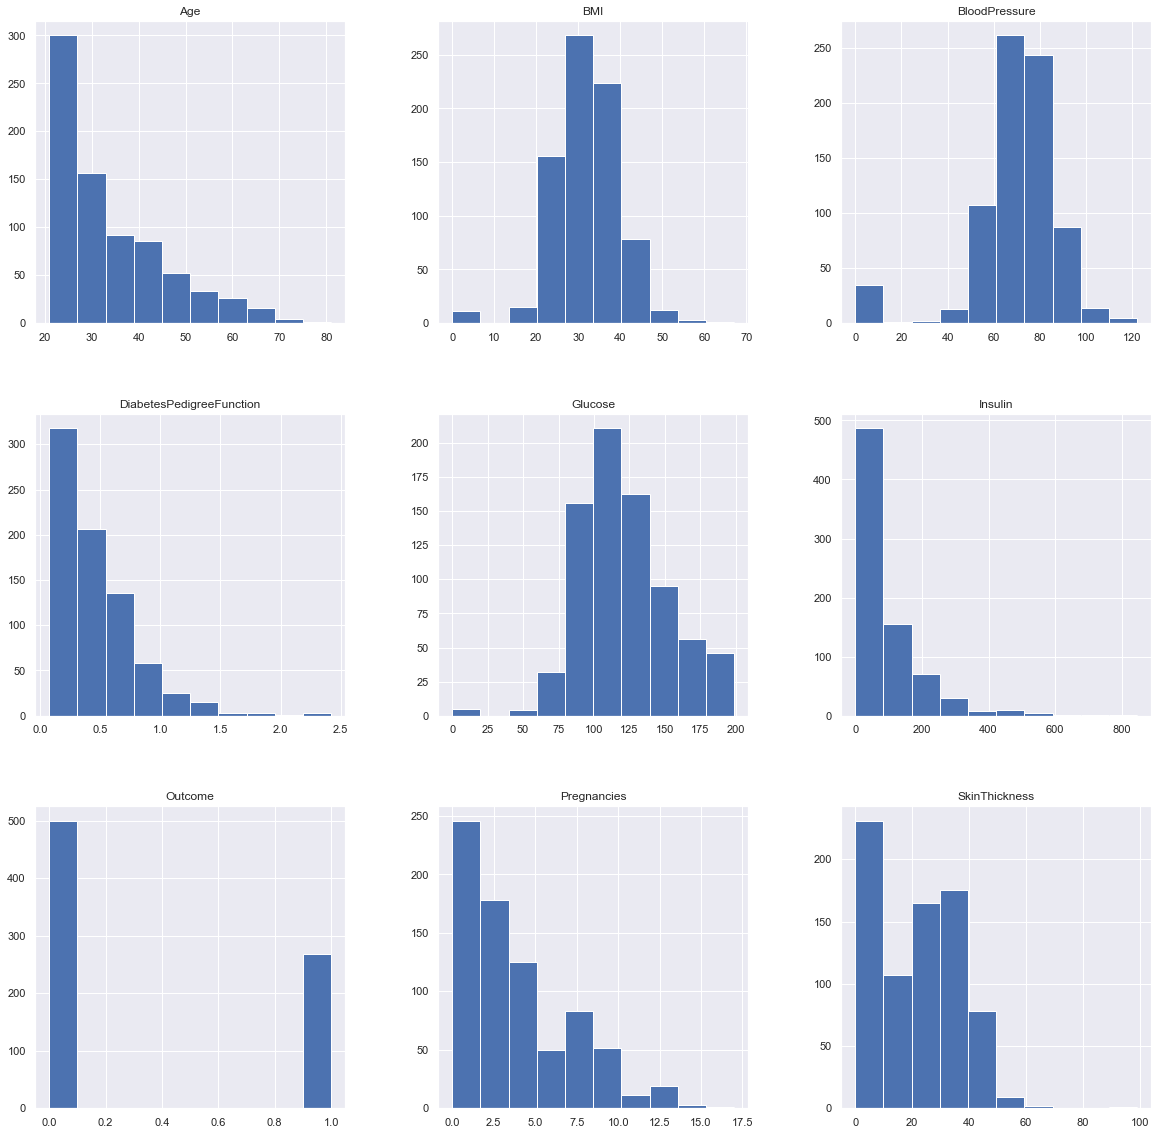

In [15]:
p = df.hist(figsize = (20,20))

# ScatterPlot

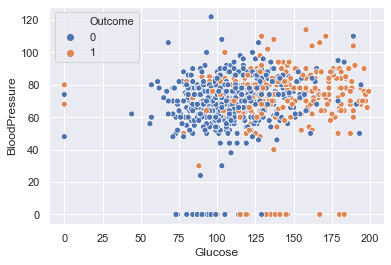

In [22]:
kp =sns.scatterplot(x= "Glucose" ,y= "BloodPressure",
              hue="Outcome",
              data=df);

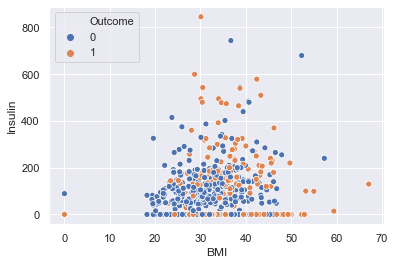

In [23]:
kp1 =sns.scatterplot(x= "BMI" ,y= "Insulin",
              hue="Outcome",
              data=df);

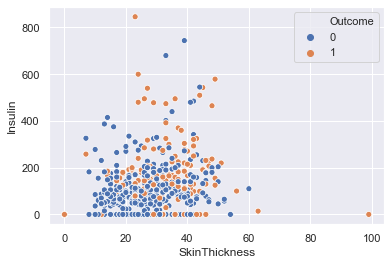

In [25]:
kp2 =sns.scatterplot(x= "SkinThickness" ,y= "Insulin",
              hue="Outcome",
              data=df);

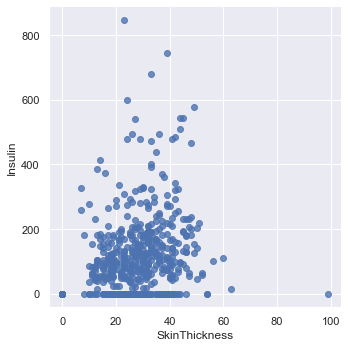

In [30]:
sns.lmplot(x='SkinThickness',y='Insulin',data=df,fit_reg=False)

# BOXPLOT

<AxesSubplot:>

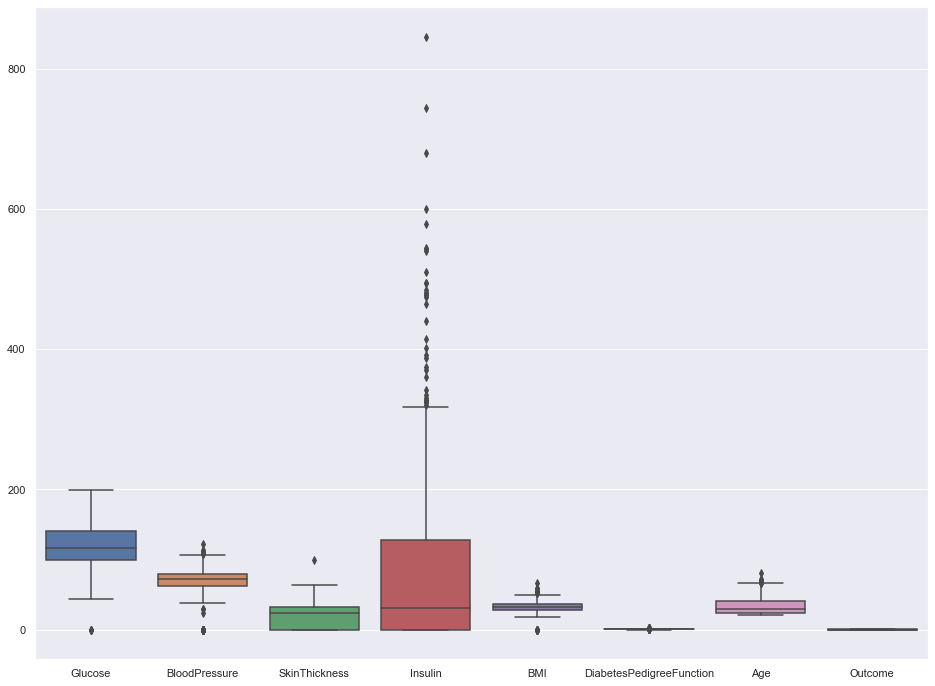

In [32]:
plt.figure(figsize=(16,12))
sns.boxplot(data=df)

<AxesSubplot:ylabel='SkinThickness'>

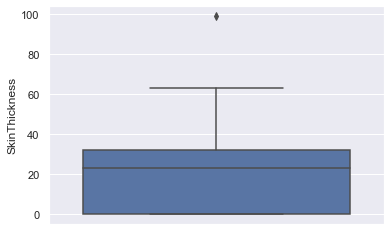

In [38]:
sns.boxplot(y = 'SkinThickness', data = df)

  # PIECHART

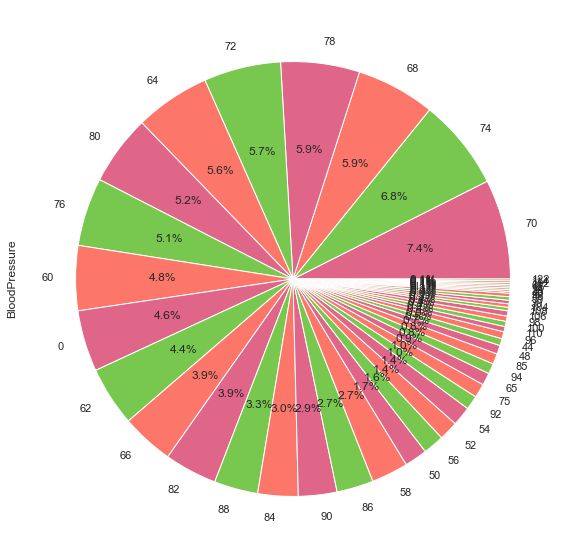

In [34]:
colors =  ["#DF6589FF", "#78C850","#FC766AFF"]
ax= df['BloodPressure'].value_counts(ascending=False).plot.pie(colors=colors,
            autopct='%1.1f%%',
            figsize=(15, 10)) 
plt.show()

# Pairplot

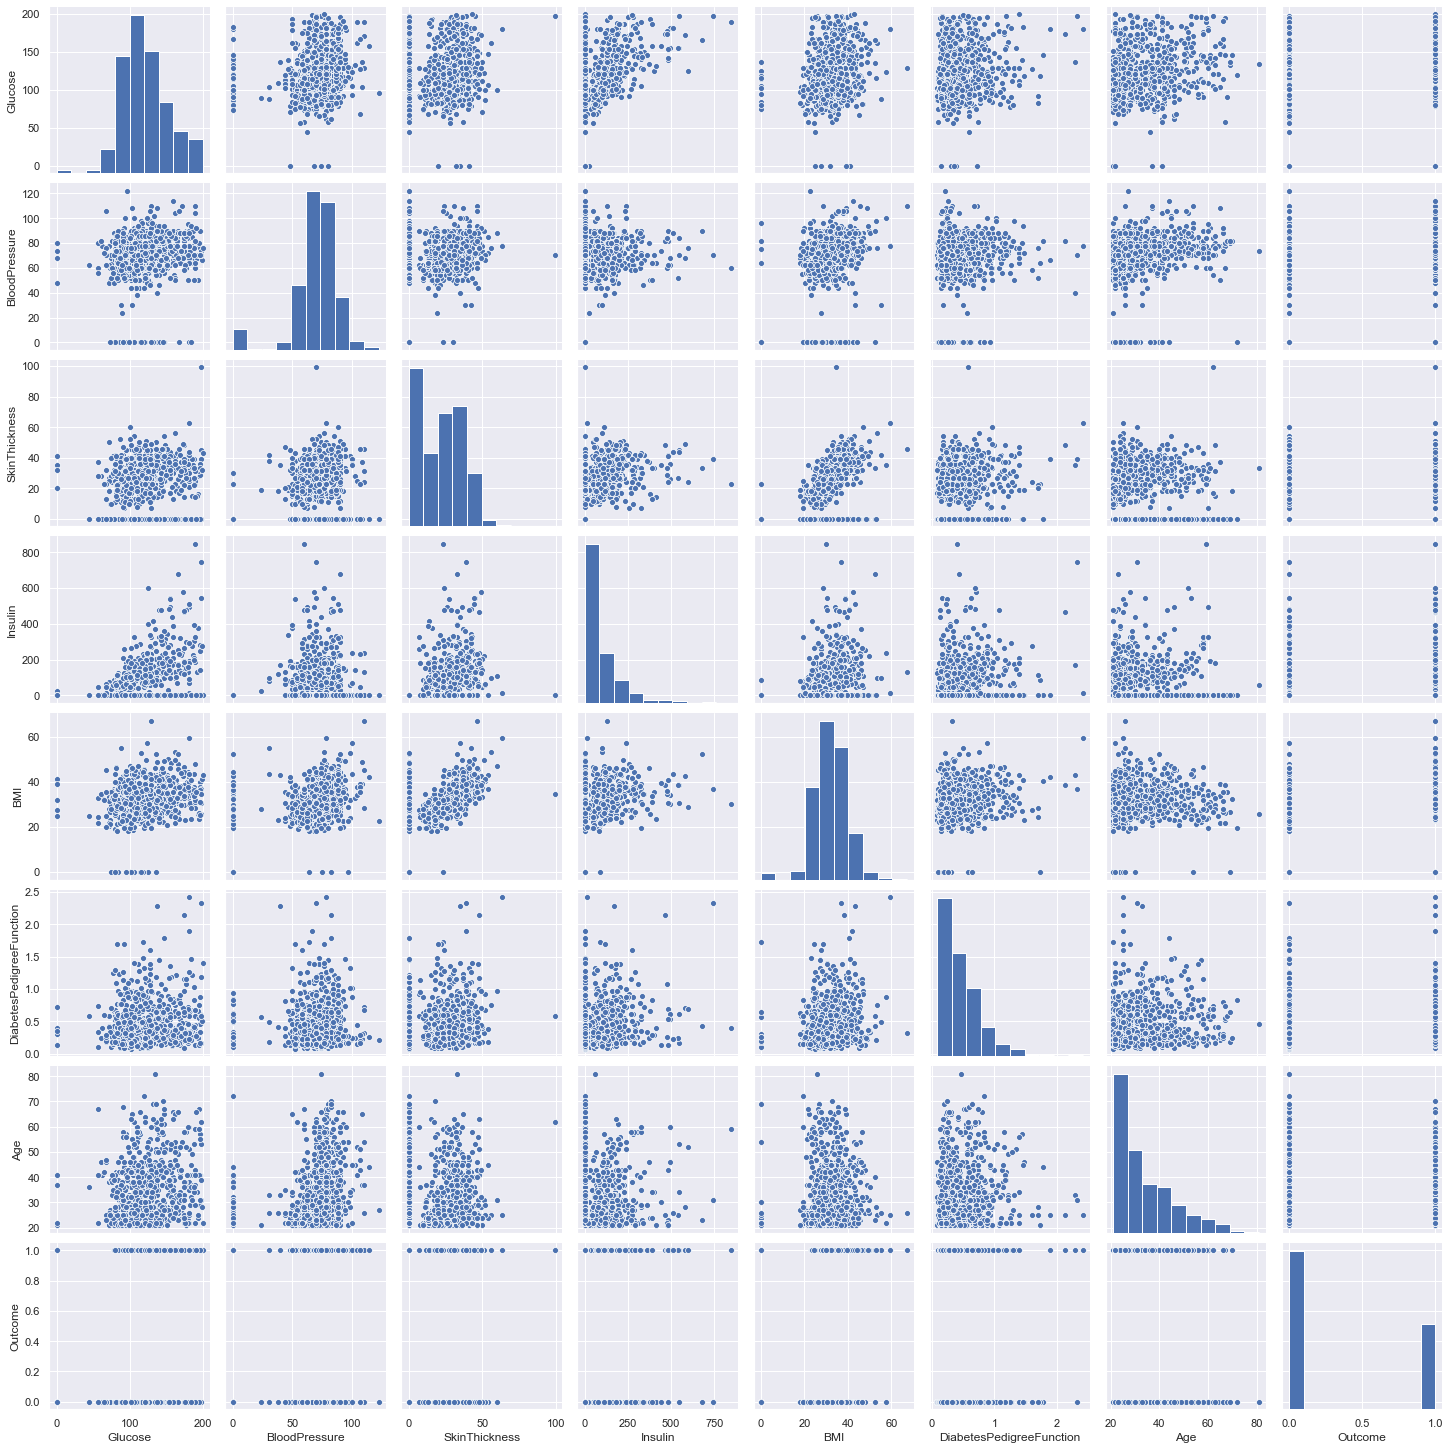

In [35]:
sns.pairplot(df)

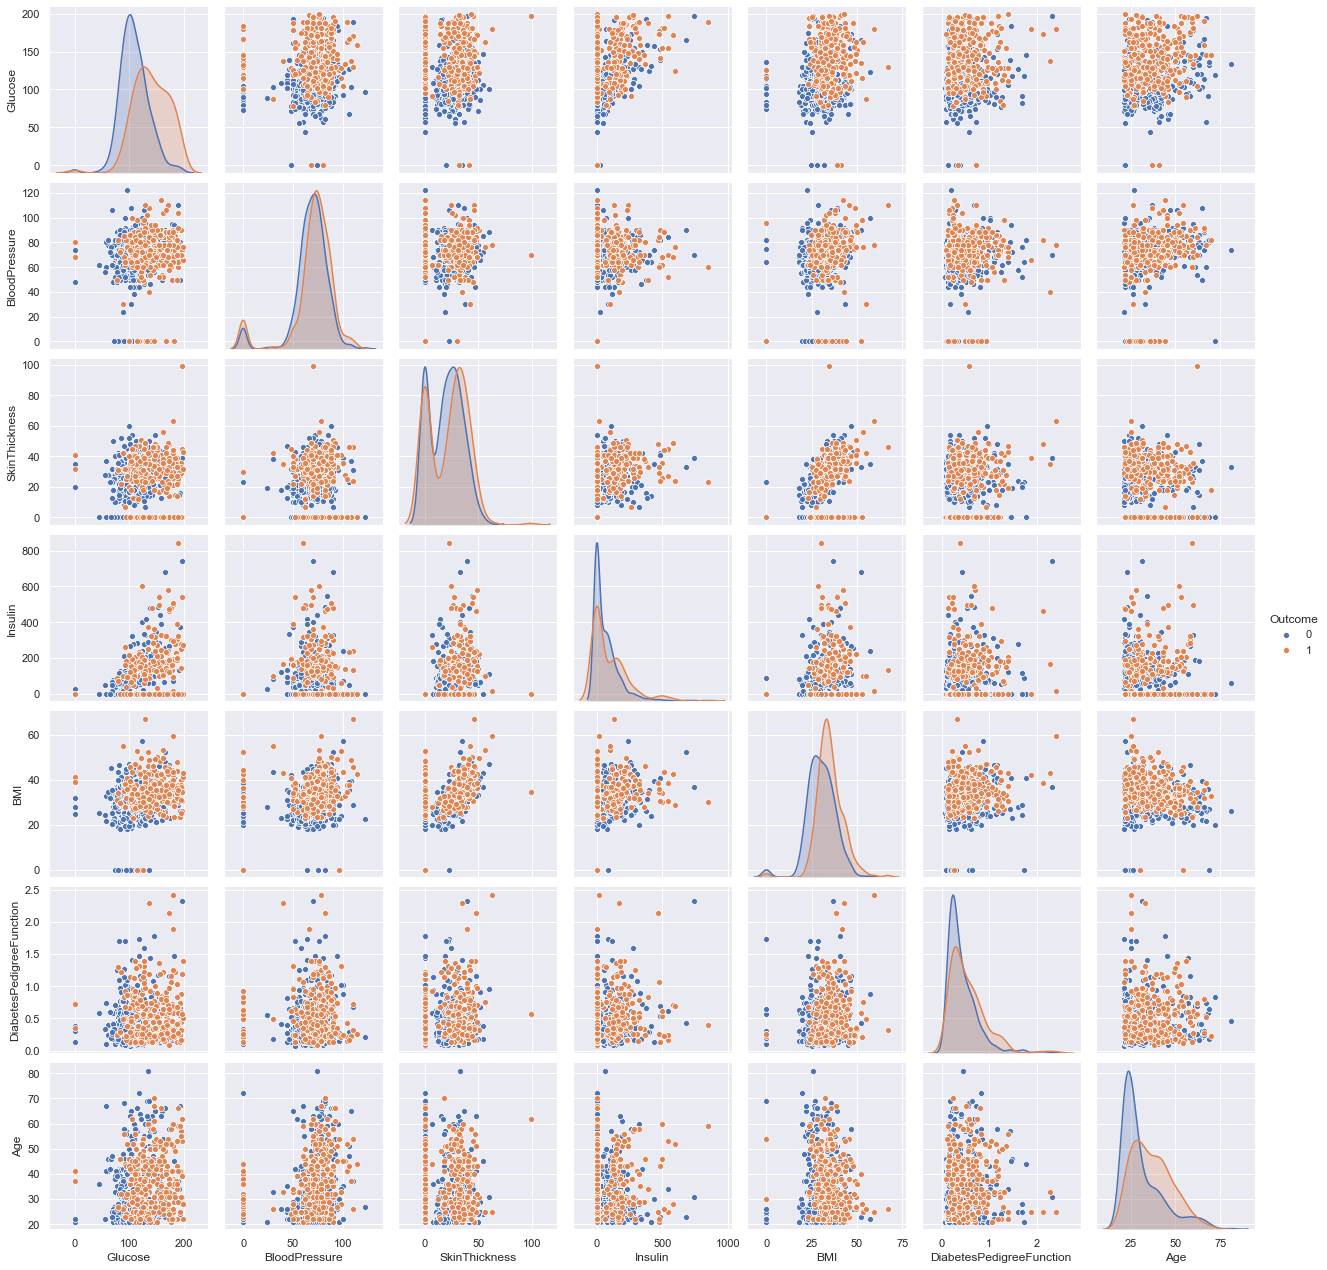

In [39]:
sns.pairplot(data =df, hue = 'Outcome')
plt.show()

# Jointplot

<Figure size 1152x864 with 0 Axes>

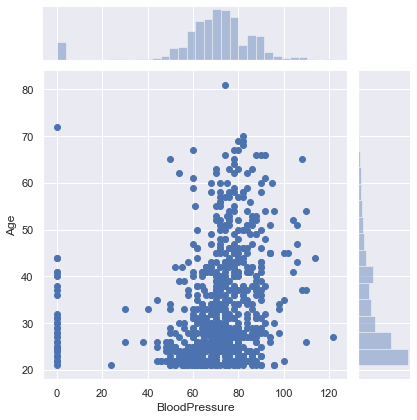

In [36]:
plt.figure(figsize=(16,12))
sns.jointplot(x='BloodPressure',y='Age',data=df)

# Density Plot

<AxesSubplot:xlabel='BloodPressure', ylabel='Age'>

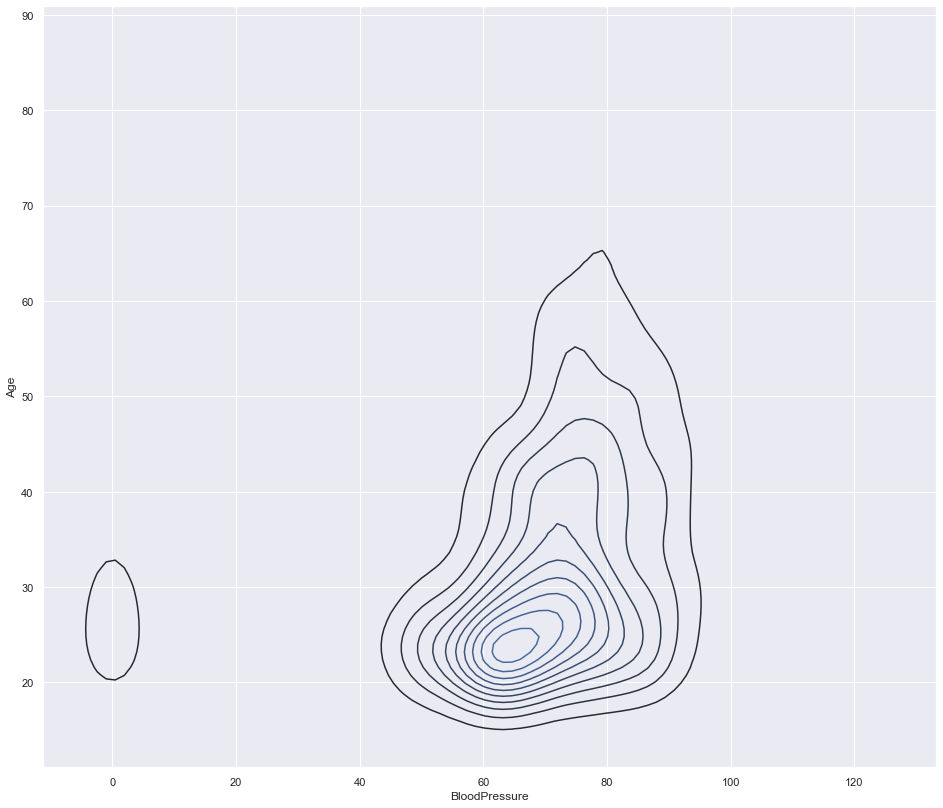

In [37]:
plt.figure(figsize=(16,14))
sns.kdeplot(df.BloodPressure, df.Age)

# Probplot :-
Each data point in y using marker symbols and draws a reference line that represents the theoretical distribution.

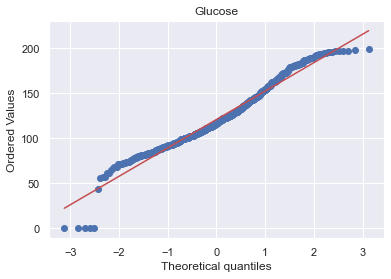

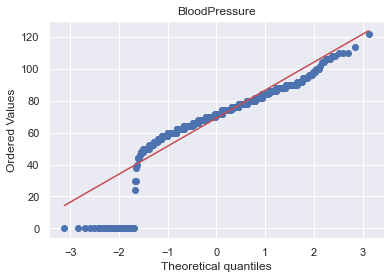

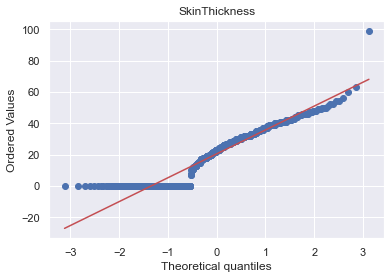

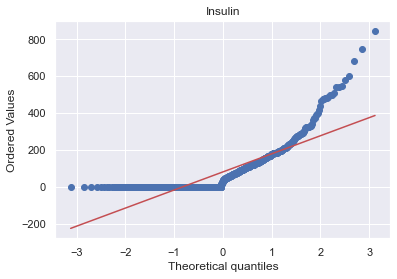

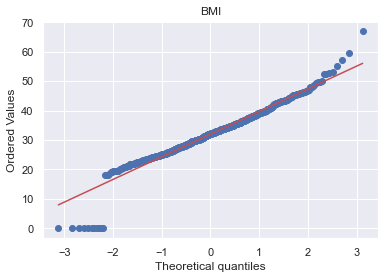

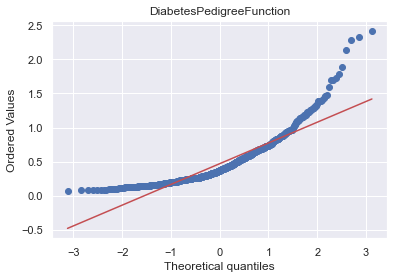

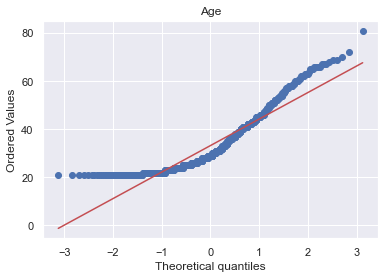

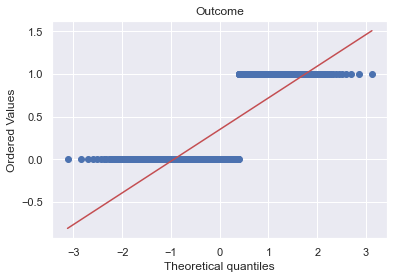

In [42]:
from scipy import stats
for feature in df.columns:
    stats.probplot(df[feature], plot = plt)
    plt.title(feature)
    plt.show()

# Training the dataset

In [43]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [45]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [46]:
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,,,,,,,
6,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
8,183,64,0,0,23.3,0.672,32
1,89,66,23,94,28.1,0.167,21
0,137,40,35,168,43.1,2.288,33


In [47]:
y.head()

Pregnancies
6    1
1    0
8    1
1    0
0    1
Name: Outcome, dtype: int64

# Splitting the dataset into training and testing phase

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting the dataset into various models:-

# Support vector machine

In [49]:
def svm_classifier(X_train, X_test, y_train, y_test):
    
    classifier_svm = SVC(kernel = 'rbf', random_state = 0)
    classifier_svm.fit(X_train, y_train)

    y_pred = classifier_svm.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_svm.score(X_train, y_train)}\nTest score : {classifier_svm.score(X_test, y_test)}")

# KNN(K-nearest neighbours)

In [50]:
def knn_classifier(X_train, X_test, y_train, y_test):
    
    classifier_knn = KNeighborsClassifier(metric = 'minkowski', p = 2)
    classifier_knn.fit(X_train, y_train)

    y_pred = classifier_knn.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_knn.score(X_train, y_train)}\nTest score : {classifier_knn.score(X_test, y_test)}")

# Naives Baye's Algorithm

In [51]:
def naive_classifier(X_train, X_test, y_train, y_test):
    
    classifier_naive = GaussianNB()
    classifier_naive.fit(X_train, y_train)

    y_pred = classifier_naive.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_naive.score(X_train, y_train)}\nTest score : {classifier_naive.score(X_test, y_test)}")

# Decision Tree Algorithm

In [52]:
def tree_classifier(X_train, X_test, y_train, y_test):
    
    classifier_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    classifier_tree.fit(X_train, y_train)

    y_pred = classifier_tree.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_tree.score(X_train, y_train)}\nTest score : {classifier_tree.score(X_test, y_test)}")

# Random forest algorithm

In [53]:
def forest_classifier(X_train, X_test, y_train, y_test):
    classifier_forest = RandomForestClassifier(criterion = 'entropy', random_state = 0)
    classifier_forest.fit(X_train, y_train)

    y_pred = classifier_forest.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_forest.score(X_train, y_train)}\nTest score : {classifier_forest.score(X_test, y_test)}")

In [54]:
def print_score(X_train, X_test, y_train, y_test):
    print("SVM:\n")
    svm_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("KNN:\n")
    knn_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("Naive:\n")
    naive_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("Decision Tree:\n")
    tree_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("Random Forest:\n")
    forest_classifier(X_train, X_test, y_train, y_test)

In [55]:
print_score(X_train, X_test, y_train, y_test)

SVM:

Train score : 0.760586319218241
Test score : 0.7922077922077922
----------------------------------------------------------------------------------------------------

KNN:

Train score : 0.7899022801302932
Test score : 0.7402597402597403
----------------------------------------------------------------------------------------------------

Naive:

Train score : 0.760586319218241
Test score : 0.7727272727272727
----------------------------------------------------------------------------------------------------

Decision Tree:

Train score : 1.0
Test score : 0.7337662337662337
----------------------------------------------------------------------------------------------------

Random Forest:

Train score : 1.0
Test score : 0.7857142857142857


In [73]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(C=20.0)
knn=KNeighborsClassifier(n_neighbors=3)
svm=SVC(kernel='linear')
dt=DecisionTreeClassifier()
rf=RandomForestClassifier(n_estimators=100)

In [75]:
log.fit(X_train,y_train)
knn.fit(X_train,y_train)
svm.fit(X_train,y_train)
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier()

In [76]:
y_log=log.predict(X_test)
y_knn=knn.predict(X_test)
y_svm=svm.predict(X_test)
y_dt=dt.predict(X_test)
y_rf=rf.predict(X_test)

In [77]:
log_cm_test=confusion_matrix(y_test,y_log)
knn_cm_test=confusion_matrix(y_test,y_knn)
svm_cm_test=confusion_matrix(y_test,y_svm)
dt_cm_test=confusion_matrix(y_test,y_dt)
rf_cm_test=confusion_matrix(y_test,y_rf)

# Compare the graph on basis of heatmap

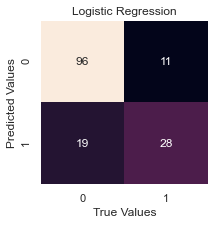

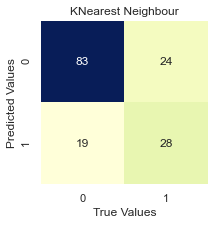

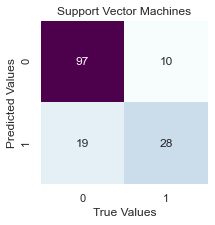

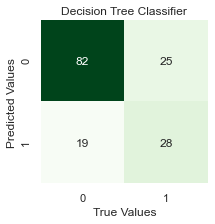

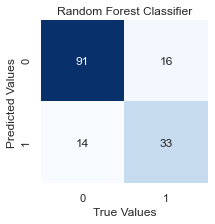

In [78]:
import seaborn as sns
plt.figure(figsize=(3,3))
sns.heatmap(log_cm_test,annot=True,cbar=False)
plt.xlabel('True Values'), plt.ylabel('Predicted Values')
plt.title('Logistic Regression')
plt.show()

plt.figure(figsize=(3,3))
sns.heatmap(knn_cm_test,annot=True,cbar=False, cmap='YlGnBu')
plt.xlabel('True Values'), plt.ylabel('Predicted Values')
plt.title('KNearest Neighbour')
plt.show()

plt.figure(figsize=(3,3))
sns.heatmap(svm_cm_test,annot=True,cbar=False, cmap='BuPu')
plt.xlabel('True Values'), plt.ylabel('Predicted Values')
plt.title('Support Vector Machines')
plt.show()

plt.figure(figsize=(3,3))
sns.heatmap(dt_cm_test,annot=True,cbar=False, cmap='Greens')
plt.xlabel('True Values'), plt.ylabel('Predicted Values')
plt.title('Decision Tree Classifier')
plt.show()

plt.figure(figsize=(3,3))
sns.heatmap(rf_cm_test,annot=True,cbar=False, cmap='Blues')
plt.xlabel('True Values'), plt.ylabel('Predicted Values')
plt.title('Random Forest Classifier')
plt.show()

# Compare the accuracy_score on the basis of barplot

In [81]:
from sklearn.metrics import accuracy_score
log_acc_test=accuracy_score(y_test,y_log)
knn_acc_test=accuracy_score(y_test,y_knn)
svm_acc_test=accuracy_score(y_test,y_svm)
dt_acc_test=accuracy_score(y_test,y_dt)
rf_acc_test=accuracy_score(y_test,y_rf)

In [83]:
print('Accuracy Scores\n')

print('\n'+'#'*20+'Logistic Regression'+'#'*20)
print(log_acc_test)

print('\n'+'#'*20+'KNearest Neighbour'+'#'*20)
print(knn_acc_test)

print('\n'+'#'*20+'SVM'+'#'*20)
print(svm_acc_test)

print('\n'+'#'*20+'Decision Tree Classifier'+'#'*20)
print(dt_acc_test)

print('\n'+'#'*20+'Random Forest Classifier'+'#'*20)
print(rf_acc_test)

Accuracy Scores


####################Logistic Regression####################
0.8051948051948052

####################KNearest Neighbour####################
0.7207792207792207

####################SVM####################
0.8116883116883117

####################Decision Tree Classifier####################
0.7142857142857143

####################Random Forest Classifier####################
0.8051948051948052


# BARPLOT

<ipython-input-90-d3070518cde9>:8: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.barh(y_pos, performance, width,align='center', alpha=1, color='rbgy')


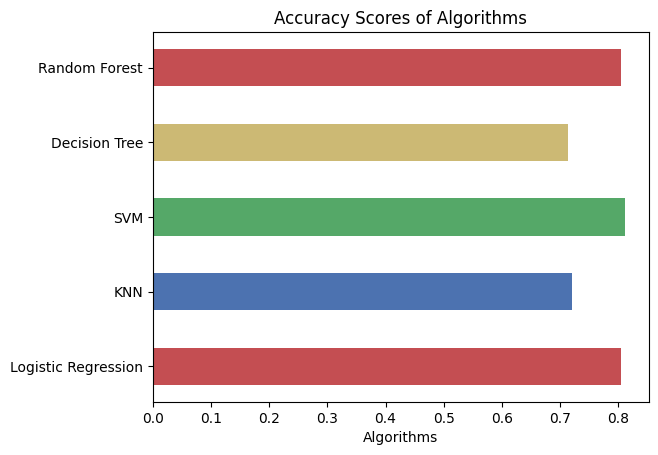

In [90]:
acc_list=[log_acc_test,knn_acc_test,svm_acc_test,dt_acc_test,rf_acc_test]
import matplotlib.pyplot as plt; plt.rcdefaults()
 
objects = ('Logistic Regression', 'KNN', 'SVM', 'Decision Tree', 'Random Forest')
y_pos = np.arange(len(objects))
performance = acc_list
width = 1/2
plt.barh(y_pos, performance, width,align='center', alpha=1, color='rbgy')
plt.yticks(y_pos,objects)
plt.xlabel('Accuracy')
plt.xlabel('Algorithms')
plt.title('Accuracy Scores of Algorithms')
plt.show()

# Performance

In [56]:
classifier_forest = RandomForestClassifier(criterion = 'entropy')
classifier_forest.fit(X_train, y_train)
y_pred = classifier_forest.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[92, 15],
       [12, 35]], dtype=int64)

In [57]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,92,15,107
1,12,35,47
All,104,50,154


# Check the data balanced or not

In [58]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

  # Find the Accuracy, Precision, Recall and  F1-score

In [61]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       107
           1       0.70      0.74      0.72        47

    accuracy                           0.82       154
   macro avg       0.79      0.80      0.80       154
weighted avg       0.83      0.82      0.83       154



In [63]:
y_pred_prob = classifier_forest.predict_proba(X_test)[:,1]
y_pred_prob

array([0.88, 0.15, 0.05, 0.57, 0.11, 0.03, 0.8 , 0.87, 0.3 , 0.48, 0.76,
       0.84, 0.07, 0.21, 0.27, 0.56, 0.86, 0.01, 0.4 , 0.3 , 0.59, 0.14,
       0.14, 0.29, 0.01, 0.31, 0.03, 0.83, 0.02, 0.09, 0.41, 0.2 , 0.2 ,
       0.54, 0.12, 0.79, 0.58, 0.02, 0.27, 0.75, 0.27, 0.1 , 0.31, 0.72,
       0.73, 0.02, 0.02, 0.14, 0.43, 0.29, 0.49, 0.16, 0.72, 0.64, 0.27,
       0.  , 0.25, 0.35, 0.35, 0.13, 0.72, 0.68, 0.06, 0.68, 0.86, 0.51,
       0.69, 0.12, 0.74, 0.17, 0.13, 0.13, 0.11, 0.79, 0.91, 0.38, 0.21,
       0.76, 0.25, 0.2 , 0.38, 0.54, 0.28, 0.  , 0.15, 0.21, 0.05, 0.41,
       0.92, 0.08, 0.41, 0.32, 0.22, 0.03, 0.85, 0.13, 0.41, 0.39, 0.54,
       0.63, 0.2 , 0.  , 0.13, 0.03, 0.67, 0.55, 0.08, 0.48, 0.05, 0.56,
       0.04, 0.55, 0.54, 0.64, 0.8 , 0.68, 0.08, 0.49, 0.26, 0.63, 0.37,
       0.42, 0.18, 0.34, 0.02, 0.01, 0.33, 0.61, 0.36, 0.55, 0.53, 0.01,
       0.05, 0.78, 0.33, 0.44, 0.37, 0.51, 0.52, 0.22, 0.05, 0.76, 0.  ,
       0.08, 0.77, 0.01, 0.09, 0.1 , 0.11, 0.49, 0.

# Roc_score

In [64]:
roc_auc_score(y_test,y_pred_prob)

0.8553390336050904

# Improving acc. by Hyperparameter Tunning

In [65]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_forest, X = X_train, y = y_train, cv = 10)
print(accuracies.mean(), accuracies.std())

0.7507667900581702 0.052994486547510405


In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
parameters = {
    'n_estimators': [25, 50, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [14, 20, 25, 30]
}

In [68]:
grid_search = GridSearchCV(estimator = classifier_forest,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
print('best_accuracy = ',grid_search.best_score_)
print('best_parameters = ', grid_search.best_params_)

best_accuracy =  0.7703067160232682
best_parameters =  {'criterion': 'entropy', 'max_depth': 25, 'n_estimators': 50}


In [69]:
classifier_forest = RandomForestClassifier(criterion = 'gini', max_depth = 25, n_estimators = 200, random_state = 0)
classifier_forest.fit(X_train, y_train)
y_pred = classifier_forest.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[93, 14],
       [15, 32]], dtype=int64)

# THANK YOU